# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [2]:
# Use some built in functions to get a quick glance at the data
import pandas as pd

df = pd.read_csv('orders.csv')
df.order_value.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_value, dtype: float64

Immediately, we notice that the max is 704,000, which seems to be the cause of our skewed metric. There is a person who is buying 2000 shoes at the same time, which isn't representative of the total population.

In [3]:
# We could instead calculate the median of the order values
df.order_value.median()

284.0

That value, $284, seems to be more reasonable for what we know about sneaker prices.

In [10]:
# Or we could divide each order by the number of sneakers purchased
df['order_value_per_sneaker'] = df.order_value / df.total_items
df.order_value_per_sneaker.median()

153.0

This value, $387.74, skews a little higher but it is still far more reasonable, because if a person buys a ton of sneakers at once it no longer weights it so heavily (this metric is actually not weighted in the traditional sense). Looking into this column reveals that there are still some stranger outliers, with shop 78 selling $25k sneakers. It may be worth investigating but for now I am going to exclude it because it is hard to fit it on a graph.

<Axes: xlabel='day'>

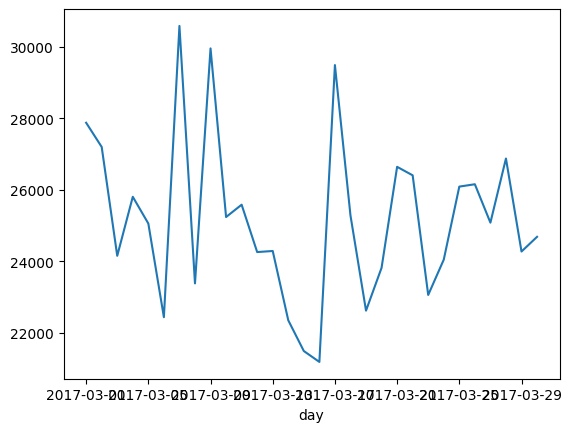

In [77]:
# Plot the trend of order value per sneaker over time
import matplotlib.pyplot as plt

df["day"] = pd.to_datetime(df["created_at"]).dt.date

y = df[df["order_value_per_sneaker"] < 25000].groupby("day")
x = y["day"]

y["order_value_per_sneaker"].sum().plot()

Excluding purchases where people are buying $25k sneakers, we can briefly see the sum (total purchases) on each day over the month. There is lots of fluctuation, maybe when drops occur?